# Clustering con Python

### importar el dataset 

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../datasets/wine/winequality-red.csv",sep=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

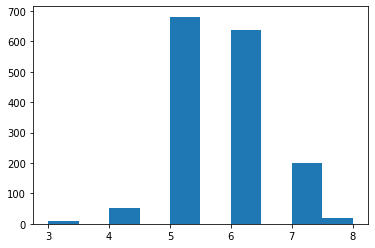

In [7]:
plt.hist(df["quality"])

In [9]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Normalización de datos

In [11]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# Clustering jerárquico con scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norm)

In [14]:
clus

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [32]:
md_h = pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

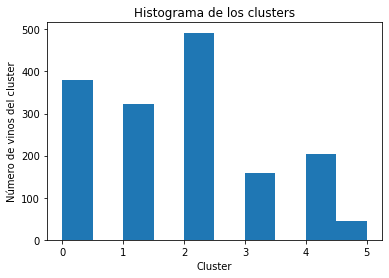

In [33]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [20]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Z = linkage(df_norm,"ward")

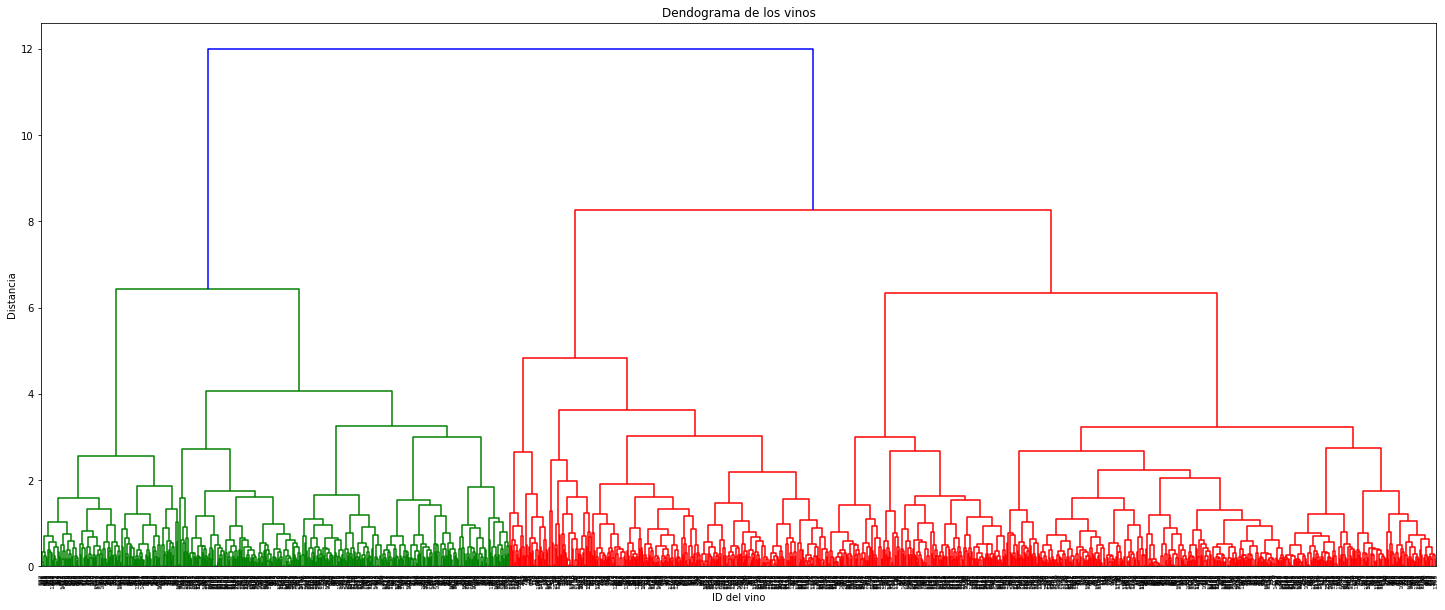

In [26]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90,leaf_font_size=6)
plt.show()

## K- means

In [47]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [48]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
model.labels_

array([0, 0, 0, ..., 3, 3, 2])

In [50]:
md_k = pd.Series(model.labels_)

In [51]:
df_norm["cluster_h"] = md_h
df_norm["cluster_k"] = md_k

In [52]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0


(array([493.,   0., 310.,   0., 309.,   0., 249.,   0., 160.,  78.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

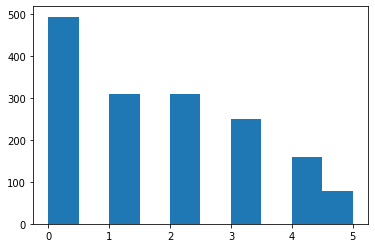

In [53]:
plt.hist(md_k)

In [54]:
model.cluster_centers_

array([[ 2.64337899e-01,  3.57324460e-01,  1.11034483e-01,
         9.16252188e-02,  1.22350638e-01,  1.49772877e-01,
         1.05727535e-01,  4.85902488e-01,  4.87262622e-01,
         1.55105610e-01,  2.29874655e-01,  4.53955375e-01,
         1.98174442e+00,  1.95740365e+00],
       [ 3.55324008e-01,  2.65919134e-01,  3.44419355e-01,
         1.70260716e-01,  1.29043029e-01,  3.59518401e-01,
         2.72688932e-01,  5.58734783e-01,  4.21590043e-01,
         1.86188912e-01,  2.39239041e-01,  4.65806452e-01,
         7.90322581e-01,  5.00000000e+00],
       [ 3.61199416e-01,  1.67996631e-01,  4.09288026e-01,
         1.01631423e-01,  1.06131579e-01,  1.62792288e-01,
         8.78246252e-02,  4.24535116e-01,  4.19769131e-01,
         2.25141949e-01,  4.52875280e-01,  6.68608414e-01,
        -5.32907052e-15,  0.00000000e+00],
       [ 2.02722394e-01,  3.30885185e-01,  1.44939759e-01,
         8.71018320e-02,  1.55171605e-01,  2.34232705e-01,
         1.31011679e-01,  3.62008976e-01,  5.

In [55]:
model.inertia_

403.97320976180777

## Interpretación final

In [56]:
df_norm.groupby("cluster_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.264338,0.357324,0.111034,0.091625,0.122351,0.149773,0.105728,0.485902,0.487263,0.155106,0.229875,0.453955,1.981744
1,0.355324,0.265919,0.344419,0.170261,0.129043,0.359518,0.272689,0.558735,0.421590,0.186189,0.239239,0.465806,0.790323
2,0.361199,0.167997,0.409288,0.101631,0.106132,0.162792,0.087825,0.424535,0.419769,0.225142,0.452875,0.668608,0.000000
3,0.202722,0.330885,0.144940,0.087102,0.155172,0.234233,0.131012,0.362009,0.530468,0.241878,0.432427,0.559036,4.164659
4,0.638330,0.209311,0.538250,0.126627,0.128537,0.147799,0.100088,0.685660,0.306496,0.225374,0.287372,0.555000,2.993750
5,0.277627,0.259747,0.296154,0.104847,0.117097,0.223546,0.207937,0.513630,0.478397,0.181483,0.212426,0.515385,1.000000
